the goal here is to see what we need to set up a basic covariance matrix. to start, we look at the the detector white noise in simcmb alongside cosmic/sample variance.

In [1]:
import deepcmbsim as dcs
import numpy as np

## lets first run things with noise options in simcmb

In [2]:
config_obj = dcs.config_obj()
print(config_obj.UserParams)

{'FORCAMB': {'DoLensing': True}, 'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]), 'Alens': array([0.8, 1. , 1.2])}, 'seed': 0, 'verbose': 1, 'normalize_cls': False, 'TT_units': 'muK', 'outfile_dir': 'outfiles', 'noise_type': 'white', 'noise_uKarcmin': 5, 'beamfwhm_arcmin': 3, 'extra_l': 300, 'max_l_use': 10000, 'cls_wanted': 'all'}


In [3]:
datas = {}

# run things with detector white noise
config_obj.update_val('max_l_use', 300)
config_obj.update_val('cls_wanted', ['clTT', 'clEE', 'clBB'])
config_obj.update_val('noise_type', None)

power_spectrum = dcs.CAMBPowerSpectrum(config_obj)
datas['no noise'] = power_spectrum.get_cls()


updated max_l_use in UserParams to 300
updated cls_wanted in UserParams to ['clTT', 'clEE', 'clBB']
updated noise_type in UserParams to None
from 12:38:21.924393 P to 12:38:24.760018 P or 2.835625 seconds total


In [4]:
# now run things with white noise
config_obj.update_val('noise_type', 'white')
power_spectrum = dcs.CAMBPowerSpectrum(config_obj)
datas['w/ detector white noise'] = power_spectrum.get_cls()

updated noise_type in UserParams to white
from 12:38:24.772744 P to 12:38:27.612704 P or 2.839960 seconds total


lets plot things

In [5]:
import matplotlib.pyplot as plt
from cmbcosmo import settings

/var/folders/65/525nx1215yj34f4dybrt4lzm0000gn/T/ipykernel_82470/875155244.py:10: RuntimeWarning: divide by zero encountered in divide
  100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],


<Figure size 1000x600 with 0 Axes>

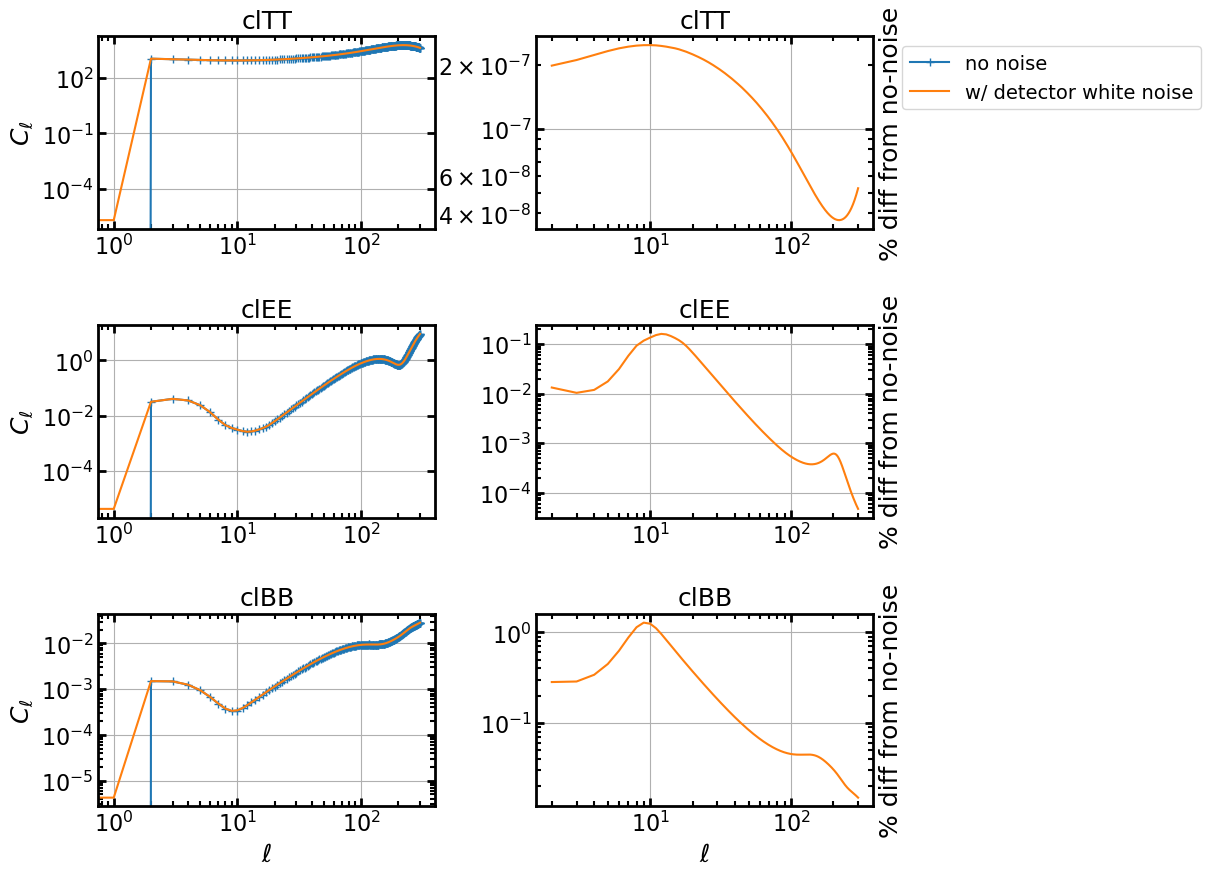

In [6]:
syms = ['+', '']
plt.clf()
fig, axes = plt.subplots(3,2)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for j, noise in enumerate(datas):
    for i, key in enumerate(['clTT', 'clEE', 'clBB']):
        p = axes[i, 0].loglog(datas[noise]['l'], datas[noise][key], syms[j] + '-', label=noise)
        if noise != 'no noise':
            axes[i, 1].loglog(datas[noise]['l'],
                            100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],
                            syms[j] + '-', label=noise, color=p[0].get_color())
        if j == 0 :
            for col in range(2):
                axes[i, col].set_title(key)
                axes[i, col].set_xscale('log')
                axes[-1, col].set_xlabel(r'$\ell$')
            for row in range(3):
                axes[row, 0].set_ylabel(r'$C_\ell$')
                axes[row, 1].set_ylabel(r'% diff from no-noise') #, rotation=0)
                axes[row, 1].yaxis.set_label_position('right')
                
axes[0, 0].legend(bbox_to_anchor=(3.3,1))

fig.set_size_inches(10,10)
plt.show()

## lets consider cosmic variance

In [7]:
newkey = 'w/ cosmic variance'
datas[newkey] = {}
ells = np.array(datas['no noise']['l'])
datas[newkey]['l'] = ells
for key in ['clTT', 'clEE', 'clBB']:
    datas[newkey][key] = datas['no noise'][key] + datas['no noise'][key] * np.sqrt(2 / (2 * ells + 1))

/var/folders/65/525nx1215yj34f4dybrt4lzm0000gn/T/ipykernel_82470/3909325697.py:10: RuntimeWarning: divide by zero encountered in divide
  100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],
/var/folders/65/525nx1215yj34f4dybrt4lzm0000gn/T/ipykernel_82470/3909325697.py:10: RuntimeWarning: invalid value encountered in divide
  100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],


<Figure size 1000x600 with 0 Axes>

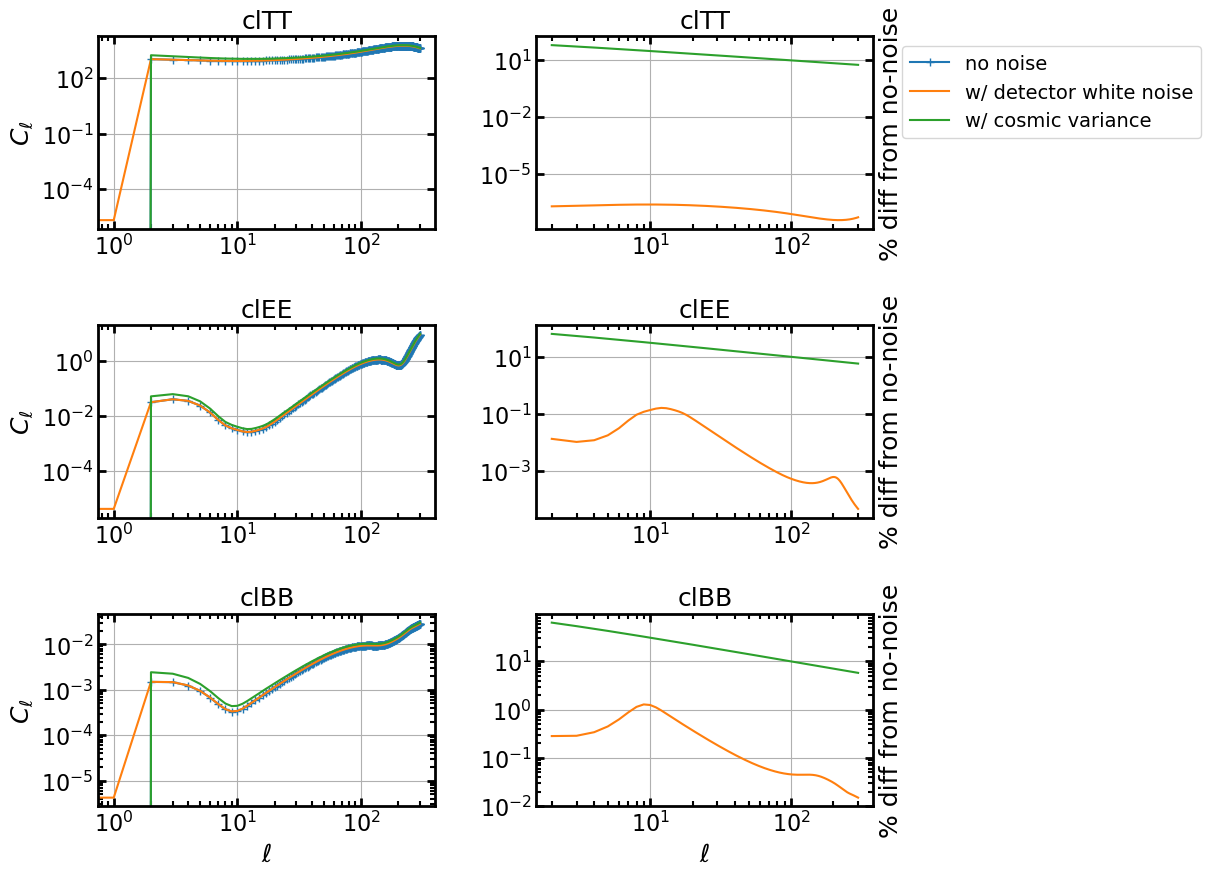

In [8]:
syms = ['+', '', '']
plt.clf()
fig, axes = plt.subplots(3,2)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for j, noise in enumerate(datas):
    for i, key in enumerate(['clTT', 'clEE', 'clBB']):
        p = axes[i, 0].loglog(datas[noise]['l'], datas[noise][key], syms[j] + '-', label=noise)
        if noise != 'no noise':
            axes[i, 1].loglog(datas[noise]['l'],
                            100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],
                            syms[j] + '-', label=noise, color=p[0].get_color())
        if j == 0 :
            for col in range(2):
                axes[i, col].set_title(key)
                axes[i, col].set_xscale('log')
                axes[-1, col].set_xlabel(r'$\ell$')
            for row in range(3):
                axes[row, 0].set_ylabel(r'$C_\ell$')
                axes[row, 1].set_ylabel(r'% diff from no-noise') #, rotation=0)
                axes[row, 1].yaxis.set_label_position('right')
                
axes[0, 0].legend(bbox_to_anchor=(3.3,1))

fig.set_size_inches(10,10)
plt.show()

## lets look at sample variance

this is essentially cosmic variance, scaled by fsky

In [9]:
fsky = 0.9
newkey  = f'w/ sample variance (fsky = {fsky})'
datas[newkey] = {}
datas[newkey]['l'] = ells
for key in ['clTT', 'clEE', 'clBB']:
    datas[newkey][key] = datas['no noise'][key] + datas['no noise'][key] * np.sqrt(2 / (fsky * (2 * ells + 1)) )

/var/folders/65/525nx1215yj34f4dybrt4lzm0000gn/T/ipykernel_82470/2020295902.py:10: RuntimeWarning: divide by zero encountered in divide
  100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],
/var/folders/65/525nx1215yj34f4dybrt4lzm0000gn/T/ipykernel_82470/2020295902.py:10: RuntimeWarning: invalid value encountered in divide
  100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],


<Figure size 1000x600 with 0 Axes>

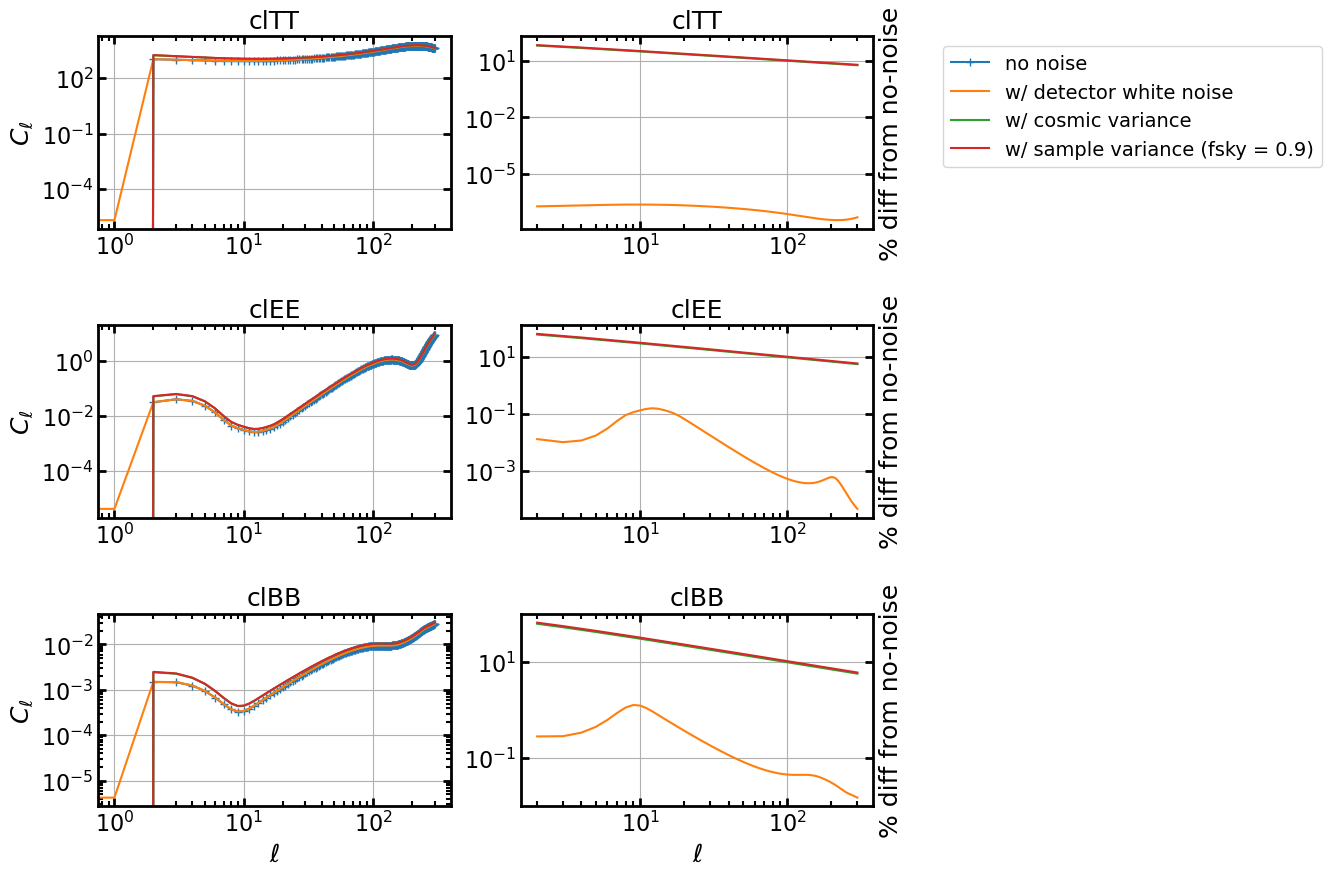

In [10]:
syms = ['+', '', '', '']
plt.clf()
fig, axes = plt.subplots(3,2)
plt.subplots_adjust(hspace=0.5, wspace=0.2)
for j, noise in enumerate(datas):
    for i, key in enumerate(['clTT', 'clEE', 'clBB']):
        p = axes[i, 0].loglog(datas[noise]['l'], datas[noise][key], syms[j] + '-', label=noise)
        if noise != 'no noise':
            axes[i, 1].loglog(datas[noise]['l'],
                            100 * (datas[noise][key] - datas['no noise'][key])/datas['no noise'][key],
                            syms[j] + '-', label=noise, color=p[0].get_color())
        if j == 0 :
            for col in range(2):
                axes[i, col].set_title(key)
                axes[i, col].set_xscale('log')
                axes[-1, col].set_xlabel(r'$\ell$')
            for row in range(3):
                axes[row, 0].set_ylabel(r'$C_\ell$')
                axes[row, 1].set_ylabel(r'% diff from no-noise') #, rotation=0)
                axes[row, 1].yaxis.set_label_position('right')
                
axes[0, 0].legend(bbox_to_anchor=(3.5,1))

fig.set_size_inches(10,10)
plt.show()

still there's no change with realizations. **need to add fsky option in userparams** if this were to be implemented in simcmb.

## lets set up the (diagonal) covariance matrix, with cosmic variance

In [11]:
from matplotlib.ticker import FormatStrFormatter
def plot_cov(cov, lmax, vmin=-1, vmax=1, keys=None):
    plt.clf()
    plt.imshow(cov, vmin=vmin, vmax=vmax)
    plt.colorbar()
    
    ax = plt.gca()
    ticks_major = np.arange(lmax/2, len(cov), lmax)
    ax.set_xticks(ticks_major, minor=True)
    ax.set_yticks(ticks_major, minor=True)
    ax.tick_params(axis='both', labelsize=18, which='minor')
    ax.tick_params(axis='x', pad=2, which='minor')
    ax.tick_params(axis='y', pad=2, which='minor')

    ax.set_xticklabels(keys, minor=True) #rotation=90)
    ax.set_yticklabels(keys, minor=True) #rotation=90)

    ticks_minor = np.arange(0, len(cov), lmax)

    ticks_minor[-1] -= 1
    ax.set_xticks(ticks_minor, minor=False)
    ax.set_yticks(ticks_minor, minor=False)

    ax.xaxis.set_major_formatter(FormatStrFormatter("%.f"))
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.f"))

    ax.tick_params(axis='both', labelsize=12,
                which='major', labelcolor='grey', pad=2)

    plt.show()

In [12]:
from cmbcosmo.helpers_misc import flatten_data

datarr = flatten_data(datas['w/ detector white noise'], ignore_keys='l')
# need to have the analog-shaped ell array
larr = np.hstack([ells, ells, ells])
# set up the covariance
cov = np.diag( datarr**2 * (2 / (2 * larr + 1)))

cov.shape

(903, 903)

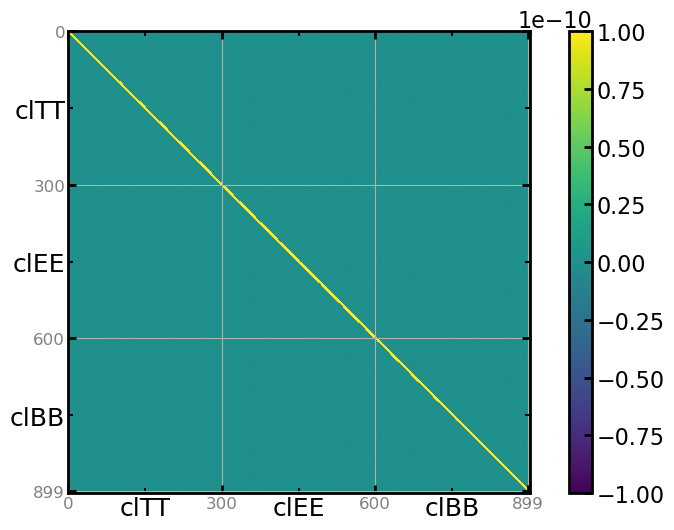

In [13]:
# lets plot
plot_cov(cov, lmax=300, vmin=-1e-10, vmax=1e-10, keys=['clTT', 'clEE', 'clBB'])

lets see what happens if we implement the color-scale cuts as in tristam+ paper

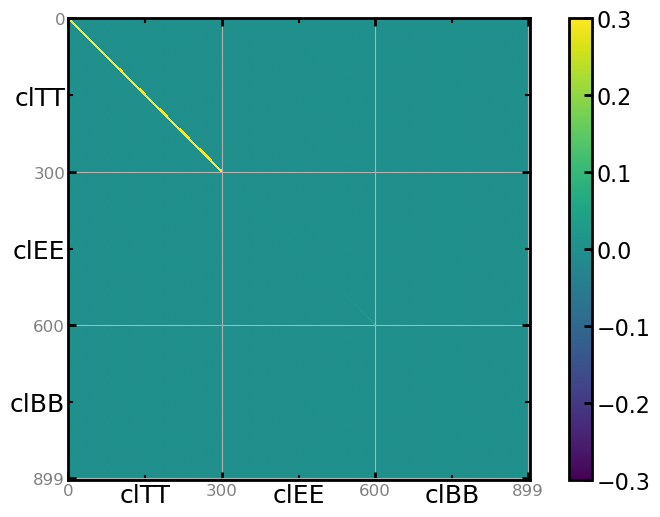

In [14]:
plot_cov(cov, lmax=300, vmin=-0.3, vmax=0.3, keys=['clTT', 'clEE', 'clBB'])

ok our EE, BB covs are pretty tiny - why?